In [12]:
import pandas as pd
import glob
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn import preprocessing
import operator

In [4]:
names=glob.glob("*.csv")
data=pd.read_csv(names[0])

In [11]:
data.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [10]:
Selected_columns=['score_phrase','platform','score','genre','release_year','release_month','release_day']
X=data[Selected_columns]
Y=data['editors_choice']

In [15]:
labelise=['score_phrase','platform','genre']

def Label(dta,x):
    y=preprocessing.LabelEncoder()
    y.fit(dta[x])
    dta[x]=y.transform(dta[x])

for x in labelise:
    Label(X,x)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
op=preprocessing.LabelEncoder()
op.fit(Y)
Y=op.transform(Y)

In [20]:
from sklearn.cross_validation import KFold

# All the models below are tested under 10-fold cross-validation (cv)

# <font color='blue'>Finetuning with K-Nearest Neighbour Classifier (knn)</font>


For knn
4
0.856057024717


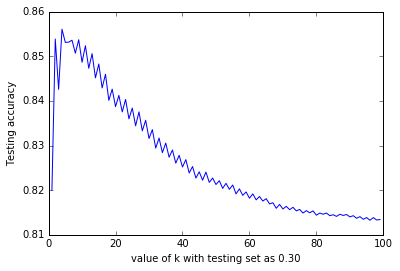

In [25]:
from sklearn.neighbors import KNeighborsClassifier
k_range=range(1,100)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    sco=cross_val_score(knn,X,Y,cv=10,scoring='accuracy')
    sco=sco.mean()
    scores.append(sco)

#import matplot lib for plotting
import matplotlib.pyplot as plt 
#allow plots to appear within the notebook
%matplotlib inline
#plot the relationship between k and testing accuracy
plt.plot(k_range,scores)
plt.xlabel('value of k ')
plt.ylabel('Testing accuracy')	
index, value = max(enumerate(scores), key=operator.itemgetter(1))
print "For knn"
print k_range[index]
print value

# <font color='blue'>Finetuning with RandomForestClassifier (rf)</font>

# <font color='blue'>Finetuning with  GradientBoostingClassifier (gb)</font>

For RandomForest
16
0.950652098594
GradientBoosting
10
0.947322950275


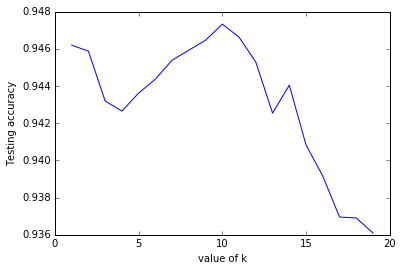

In [35]:
k_range=range(1,20)
scores=[]
for k in k_range:
    clf= RandomForestClassifier(n_estimators=10*k)
    sco=cross_val_score(clf,X,Y,cv=10,scoring='accuracy')
    sco=sco.mean()
    scores.append(sco)

plt.plot(k_range,scores)
plt.xlabel('value of k')
plt.ylabel('Testing accuracy')
index, value = max(enumerate(scores), key=operator.itemgetter(1))
print "For RandomForest"
print k_range[index]
print value


k_range=range(1,20)
scores=[]
for k in k_range:
    clf = GradientBoostingClassifier(n_estimators=10*k)
    sco=cross_val_score(clf,X,Y,cv=10,scoring='accuracy')
    sco=sco.mean()
    scores.append(sco)

plt.plot(k_range,scores)
plt.xlabel('value of k')
plt.ylabel('Testing accuracy')
index, value = max(enumerate(scores), key=operator.itemgetter(1))
print "GradientBoosting"
print k_range[index]
print value

# <font color='blue'>Finetuning with Logistic Regression (lr)</font>

In [28]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
sco=cross_val_score(logreg,X,Y,cv=10,scoring='accuracy')
print sco.mean()

0.934221873334


# <font color='blue'>Ensembling </font></br>
<b>Ensembling Technique Used is Voted Ensemble with finding out the Proper Weights to be Used for each classifier</b>
<img src="Ensembling.png">

In [44]:
# Split the Data into Training and Testing Set
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=3)

In [45]:
# Initialise the Models with Obtained Optimal Parrameters Above
knn=KNeighborsClassifier(n_neighbors=4)
gb=GradientBoostingClassifier(n_estimators=100)
rf=RandomForestClassifier(n_estimators=160)
lr=LogisticRegression()

# Train the Models on Training Data
lr.fit(x_train,y_train)
knn.fit(x_train,y_train)
rf.fit(x_train,y_train)
gb.fit(x_train,y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [46]:
# Make Predictions on testing Data
y_pred_lr=lr.predict(x_test)
y_pred_knn=knn.predict(x_test)
y_pred_rf=rf.predict(x_test)
y_pred_gb=gb.predict(x_test)

In [47]:
ans=[]

#Initialised Accuracy to zero
accuracy=0

#This variable will take into account total number of weight range to be used [0,co) 
co=7

#Adding  Corresponding vote to the Particular predicted value.
def fun(a,b,vote):
    try:
        a[b]=a[b]+vote
    except:
        a[b]=vote
    return a    

# Combining the predictions of different Classifiers over the given votes available to different Classifiers

# the lra,knna,rfa,gba are the single predictions of different classifiers

# the lrv,knnv,rfv,gbv are the votes allotted to them
"""
For e.g 

Classifier                Predicted Value
Linear regression predicted 1
KNN               predicted 0
Random Forrest    predicted 1
Gradient Boosting Predicted 0

And corresponding votes alloted 


Classifier         Votes

Linear regression  1
KNN                1
Random Forrest     2

Gradient Boosting  3

so total count of 1

1*1+2*1=3

and Total count of 0

1+3=4

So the Voted Ensembled output will be 0 because it have total 4 votes larger than 3 to that of 1

The same Logic for different number of votes alloted to different classifier outputs and then taking the one 
with Maximum Accuracy is implemented here.

"""

def combine_custom(lra,knna,rfa,gba,lrv,knnv,rfv,gbv):
    d=dict([])
    d[lra]=lrv
    d=fun(d,knna,knnv)  
    d=fun(d,rfa,rfv)
    d=fun(d,gba,gbv)
    return max(d.iteritems(), key=operator.itemgetter(1))[0]


for a in range(0,co):
    for b in range(0,co):
        for c in range(0,co):
            for d in range(0,co):
                y_pred=[]
                for a1,b1,c1,d1 in zip(y_pred_lr,y_pred_knn,y_pred_rf,y_pred_gb):
                    y_pred.append(combine_custom(a1,b1,c1,d1,a,b,c,d))
                taccuracy=metrics.accuracy_score(y_test,y_pred)
                if accuracy<taccuracy:
                    accuracy=taccuracy
                    ans=[a,b,c,d]
                        

                        
print accuracy
print ans                         

0.971009305655
[0, 0, 1, 0]


In [48]:
print "Accuracy"
print accuracy
print "Optimal parrameters"
print ans

Accuracy
0.971009305655
Optimal parrameters
[0, 0, 1, 0]


<b>Just see how the Accuracy is increased from 95% best RandomForrest to 97% by ensembling. this 1% percent increase in Accuracy is attained by using the voted ensemble technique.</b>

# <font color='blue'>Model Stacking </font></br>
<b>Stacking is another very powerfull technique for finding out the Meta Model of Higher Accuracy and Very low overfitting. </b>
<img src='Stacking.png'>

In [54]:

y_p_lr=lr.predict(X)
y_p_knn=knn.predict(X)
y_p_rf=rf.predict(X)
y_p_gb=gb.predict(X)

X_stem=[y_p_lr,y_p_knn,y_p_rf,y_p_gb]
X_stem=np.asarray(X_stem)

In [55]:
print X_stem.shape
print Y.shape

(4, 18625)
(18625,)


In [67]:
X_stem=np.transpose(X_stem)
print X_stem.shape

(18625, 4)


For RandomForest
1
0.991033425593


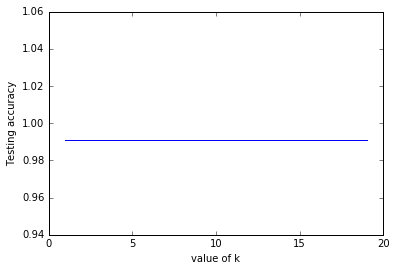

In [68]:
k_range=range(1,20)
scores=[]
for k in k_range:
    clf= RandomForestClassifier(n_estimators=10*k)
    sco=cross_val_score(clf,X_stem,Y,cv=10,scoring='accuracy')
    sco=sco.mean()
    scores.append(sco)

plt.plot(k_range,scores)
plt.xlabel('value of k')
plt.ylabel('Testing accuracy')
index, value = max(enumerate(scores), key=operator.itemgetter(1))
print "For RandomForest"
print k_range[index]
print value

<b>So here you can see by Stacking different Models we got An Accuracy of 99 % !!! this rarely happens in a data Science problem in which we can reach such an high Accuracy.</b>

<b>We can also follow from here on same above procedure in which we can first go for k-fold cross-validation for choosing the best parrameters of different models and then Making an Ensemble and Stacking Model for further increase in Accuracy. But this 99% is a decent benchmark so we can stop here.</b>